### Regression

### Big Mart Sales Prediction Problem

#### Problem Statement

#### Sales Prediction for Big Mart Outlets
- The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also,    certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

- Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

#### Dataset Collection

Collected data from https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/#ProblemStatement<br>

#### About Dataset

We have train (8523) and test (5681) data set, train data set has both input and output variable(s). <br>
Train file: CSV containing the item outlet information with sales value <br>
Test file: CSV containing item outlet combinations for which sales need to be forecasted <br>

#### About Target

We need to predict the sales for test data set.

#### Suitable Metric based on the problem and target

Model performance will be evaluated on the basis of our prediction of the sales for the test data (test.csv), <br>
which contains similar data-points as train except for the sales to be predicted.<br>
We at our end, have the actual sales for the test dataset, against which our predictions will be evaluated. <br>
We will use the Root Mean Square Error value to judge your response.


#### Importing packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Reading data

In [2]:
train_data = pd.read_csv("Data/train_bm.csv")
test_data = pd.read_csv("Data/test_bm.csv")

In [3]:
data=pd.concat([train_data,test_data],ignore_index=True)

In [4]:
train_data.shape

(8523, 12)

In [5]:
test_data.shape

(5681, 11)

In [6]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [8]:
data.shape

(14204, 12)

#### Statistical Analysis

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [10]:
data.describe().columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [11]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [12]:
data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.015901,0.036236,0.000645,0.014123
Item_Visibility,-0.015901,1.000000,-0.006351,-0.083678,-0.128625
Item_MRP,0.036236,-0.006351,1.000000,0.000141,0.567574
Outlet_Establishment_Year,0.000645,-0.083678,0.000141,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


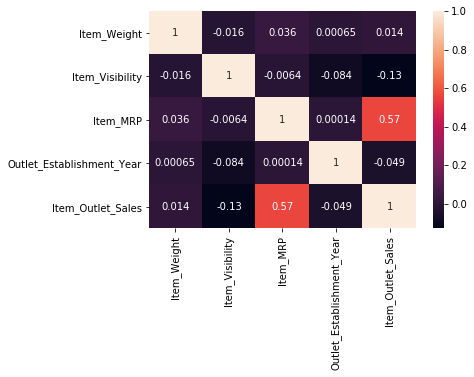

In [13]:
sns.heatmap(data.corr(),annot=True)

#### Data Cleaning
- Outlier removal
- Imputation

we have missing values in train and test data

In [14]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [15]:
data.dtypes.index

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

In [54]:
Q1 - 1.5 * IQR

Item_Weight                    -3.350000
Item_Visibility                -0.073467
Item_MRP                      -43.753400
Outlet_Establishment_Year    1961.500000
Item_Outlet_Sales           -2566.326100
dtype: float64

In [55]:
Q3 + 1.5 * IQR

Item_Weight                    28.81000
Item_Visibility                 0.19454
Item_MRP                      323.62100
Outlet_Establishment_Year    2029.50000
Item_Outlet_Sales            6501.86990
dtype: float64

In [56]:
print((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))

       Item_Fat_Content  Item_Identifier  Item_MRP  Item_Outlet_Sales  \
0                 False            False     False              False   
1                 False            False     False              False   
2                 False            False     False              False   
3                 False            False     False              False   
4                 False            False     False              False   
...                 ...              ...       ...                ...   
14199             False            False     False              False   
14200             False            False     False              False   
14201             False            False     False              False   
14202             False            False     False              False   
14203             False            False     False              False   

       Item_Type  Item_Visibility  Item_Weight  Outlet_Establishment_Year  \
0          False            False        False

In [57]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [58]:
data_out.shape

(13757, 12)

In [65]:
import warnings
warnings.filterwarnings("ignore")
data_out["Item_Weight"] = data_out["Item_Weight"].fillna(data_out["Item_Weight"].mean())
data_out["Outlet_Size"] = data_out["Outlet_Size"].fillna(data_out["Outlet_Size"].mode()[0])

In [67]:
data_out.Outlet_Size.isnull().sum()

0

In [68]:
data_out.Item_Weight.isnull().sum()

0

#### Exploratory Data Analysis

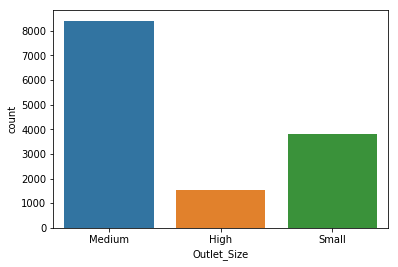

In [69]:
sns.countplot(data_out.Outlet_Size)

(array([201., 194., 153., 128., 119.,  71.,  37.,  39.,  41.,  17.]),
 array([  33.29   ,  670.99324, 1308.69648, 1946.39972, 2584.10296,
        3221.8062 , 3859.50944, 4497.21268, 5134.91592, 5772.61916,
        6410.3224 ]),
 <a list of 10 Patch objects>)

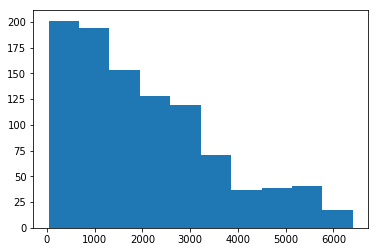

In [70]:
x = data_out['Item_Outlet_Sales'].head(1000)
plt.hist(x)

<BarContainer object of 24 artists>

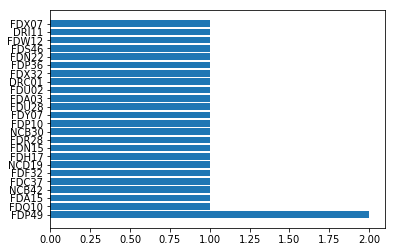

In [71]:
x = data_out['Item_Identifier'].head(25)
plt.barh(x.value_counts().index,x.value_counts())

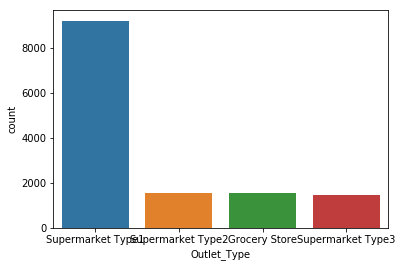

In [72]:
sns.countplot(data_out.Outlet_Type)

In [73]:
data_out.Outlet_Location_Type.value_counts()

Tier 3    5335
Tier 2    4597
Tier 1    3825
Name: Outlet_Location_Type, dtype: int64

<BarContainer object of 10 artists>

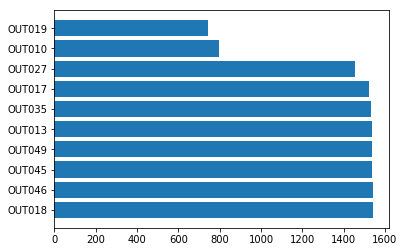

In [74]:
plt.barh(data_out.Outlet_Identifier.value_counts().index,data_out.Outlet_Identifier.value_counts())

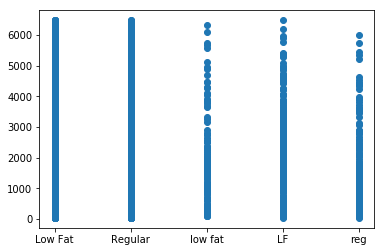

In [75]:
plt.scatter(x='Item_Fat_Content', y='Item_Outlet_Sales',data=data_out)

In [76]:
x1 = data_out.Item_Identifier.head(20)
y1 = data_out.Item_Outlet_Sales.head(20)

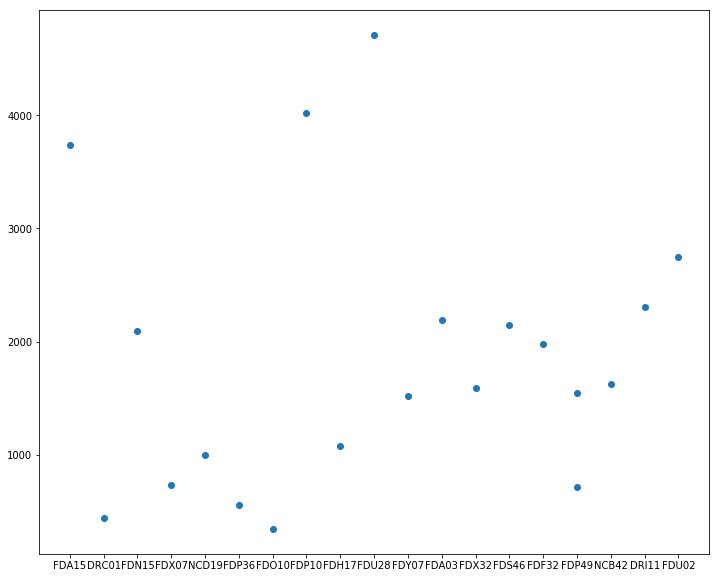

In [77]:
plt.figure(figsize=(12,10))
plt.scatter(x=x1, y=y1,data=data_out)

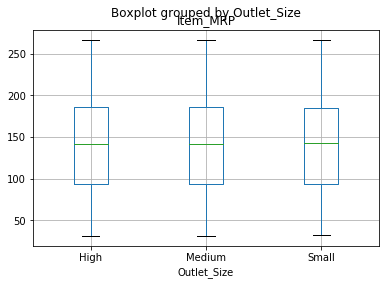

In [43]:
data.boxplot(column='Item_MRP', by='Outlet_Size')

In [100]:
num_cols = data_out.select_dtypes(exclude=object)
num_cols.drop("Item_Outlet_Sales",axis=1,inplace=True)
num_cols.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

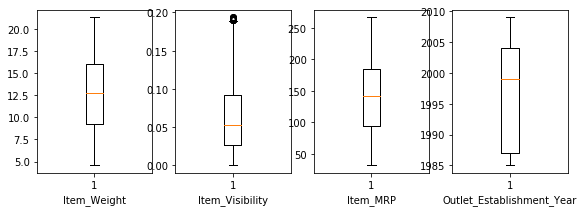

In [101]:
plt.figure(figsize=(12,3))
for i in range(len(num_cols.columns)):
    plt.subplot(1,5,i+1)
    plt.xlabel(num_cols.columns[i])
    plt.boxplot(num_cols[num_cols.columns[i]])

{'whiskers': [<matplotlib.lines.Line2D at 0x2239dcb0828>,
 'caps': [<matplotlib.lines.Line2D at 0x2239dc971d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2239dcb06a0>],
 'medians': [<matplotlib.lines.Line2D at 0x2239dc97a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x2239dc97ef0>],
 'means': []}

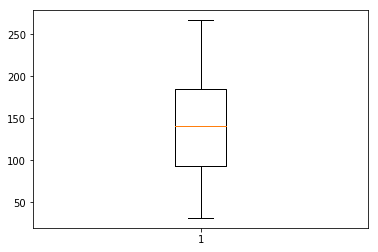

In [94]:
plt.boxplot(data_out["Item_MRP"])

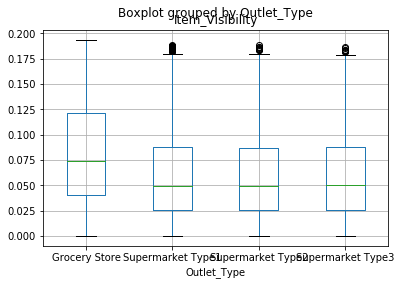

In [102]:
#plt.figure(figsize=(12,9))
data_out.boxplot(column='Item_Visibility', by='Outlet_Type')

In [108]:
cat_columns = data_out.select_dtypes(include=object)
cat_cols = cat_columns.columns
cat_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

#### Preprocessing
- Scaling


In [109]:
data_out.Item_Fat_Content.value_counts()

Low Fat    8234
Regular    4659
LF          503
reg         189
low fat     172
Name: Item_Fat_Content, dtype: int64

In [110]:
data_out.Item_Fat_Content=data_out.Item_Fat_Content.replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data_out.Item_Fat_Content.value_counts()

Low Fat    8909
Regular    4848
Name: Item_Fat_Content, dtype: int64

In [111]:
data_out['Item_Type'].value_counts()

Fruits and Vegetables    1940
Snack Foods              1921
Household                1508
Frozen Foods             1378
Dairy                    1095
Baking Goods             1055
Canned                   1049
Health and Hygiene        839
Meat                      717
Soft Drinks               706
Breads                    402
Hard Drinks               352
Others                    276
Starchy Foods             258
Breakfast                 176
Seafood                    85
Name: Item_Type, dtype: int64

In [112]:
data_out.Item_Type.nunique()

16

In [113]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_out['Outlet'] = le.fit_transform(data_out['Outlet_Identifier'])
var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    data_out[i] = le.fit_transform(data_out[i])

In [114]:
data_out['Item'] = le.fit_transform(data_out['Item_Identifier'])

In [115]:
data_out.drop(['Outlet_Establishment_Year','Item_Identifier','Outlet_Identifier'],inplace=True,axis=1)

In [116]:
data_out

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet,Item
0,9.30,0,0.016047,4,249.8092,1,0,1,3735.1380,9,156
1,5.92,1,0.019278,14,48.2692,1,2,2,443.4228,3,8
2,17.50,0,0.016760,10,141.6180,1,0,1,2097.2700,9,662
3,19.20,1,0.000000,6,182.0950,1,2,0,732.3800,0,1121
4,8.93,0,0.000000,9,53.8614,0,2,1,994.7052,1,1297
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.50,1,0.013496,13,141.3154,2,0,1,NaN,8,233
14200,7.60,1,0.142991,15,169.1448,1,2,2,NaN,3,308
14201,10.00,0,0.073529,8,118.7440,1,1,1,NaN,7,1426
14202,15.30,1,0.000000,3,214.6218,1,1,1,NaN,2,521


In [117]:
data_out['Item_Outlet_Sales'][:8523].isnull().sum()

334

In [118]:
8523-334

8189

In [119]:
data_out['Item_Outlet_Sales'][:8189].isnull().sum()

0

In [120]:
train=data_out.iloc[:8189,:]
test=data_out.iloc[8189:,:]

In [121]:
train.corr()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet,Item
Item_Weight,1.000000,-0.022325,-0.008210,0.029680,0.026390,-0.008469,0.005099,-0.005714,0.010945,-0.010785,0.045013
Item_Fat_Content,-0.022325,1.000000,0.049481,-0.138459,0.009750,-0.002304,-0.002654,0.005809,0.026503,0.004368,-0.116888
Item_Visibility,-0.008210,0.049481,1.000000,-0.037768,0.001582,0.036762,-0.012997,-0.093447,-0.070335,-0.053735,-0.023713
Item_Type,0.029680,-0.138459,-0.037768,1.000000,0.031870,-0.001309,0.003341,0.001202,0.017399,-0.000407,-0.014961
Item_MRP,0.026390,0.009750,0.001582,0.031870,1.000000,0.009728,-0.011290,-0.033615,0.564568,0.001016,0.012153
Outlet_Size,-0.008469,-0.002304,0.036762,-0.001309,0.009728,1.000000,-0.609563,-0.191148,-0.073258,0.514039,0.001558
Outlet_Location_Type,0.005099,-0.002654,-0.012997,0.003341,-0.011290,-0.609563,1.000000,0.466459,0.055633,-0.728702,0.002529
Outlet_Type,-0.005714,0.005809,-0.093447,0.001202,-0.033615,-0.191148,0.466459,1.000000,0.352813,0.078838,-0.004801
Item_Outlet_Sales,0.010945,0.026503,-0.070335,0.017399,0.564568,-0.073258,0.055633,0.352813,1.000000,0.166110,-0.000066
Outlet,-0.010785,0.004368,-0.053735,-0.000407,0.001016,0.514039,-0.728702,0.078838,0.166110,1.000000,-0.010629


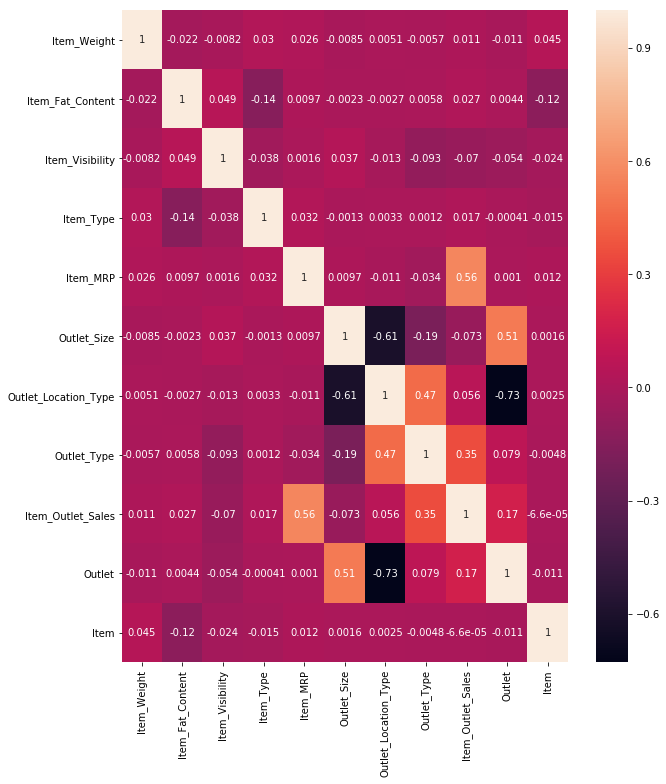

In [123]:
plt.figure(figsize=(10,12))
sns.heatmap(train.corr(),annot=True)

In [124]:
#Splitting train data into train and test
y = train['Item_Outlet_Sales']

In [125]:
train.drop('Item_Outlet_Sales',inplace=True,axis=1)

In [126]:
#test.drop('Item_Outlet_Sales',inplace=True,axis=1)

In [127]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Outlet,Item
0,9.30,0,0.016047,4,249.8092,1,0,1,9,156
1,5.92,1,0.019278,14,48.2692,1,2,2,3,8
2,17.50,0,0.016760,10,141.6180,1,0,1,9,662
3,19.20,1,0.000000,6,182.0950,1,2,0,0,1121
4,8.93,0,0.000000,9,53.8614,0,2,1,1,1297


In [128]:
train.columns

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Outlet', 'Item'],
      dtype='object')

In [129]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

#### Standardization

In [130]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_std = sc.fit_transform(train)

In [131]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(train_std,y,test_size=0.2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(6551, 10) (1638, 10) (6551,) (1638,)


#### Building models on the data

In [150]:
#Liner Regression model
from sklearn.neighbors import KNeighborsRegressor
model1 = KNeighborsRegressor()
model1.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [151]:
y_pred = model1.predict(x_test)

In [152]:
predicted = pd.DataFrame({'pred':y_pred,'actual':y_test})
predicted

,pred,actual
7700,1203.10060,970.7364
891,749.15816,1043.9744
1944,3303.56644,3153.2288
4611,193.74780,307.5996
2036,1911.64496,1911.5118
...,...,...
6359,2886.90880,3010.7476
4041,842.76964,517.3266
5238,2168.91008,3199.8348
2181,1710.57336,1677.1502


In [153]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(y_pred,y_test))

1028.9826084281558

In [154]:
from sklearn.metrics import r2_score
print("R2-Score",r2_score(y_pred, y_test))

R2-Score 0.1708162774005756


In [161]:
# Decision Tree Model
from sklearn.tree import DecisionTreeRegressor
model3 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
model3.fit(x_train,y_train)
np.sqrt(mean_squared_error(model3.predict(x_test),y_test))

963.1928086380973

In [162]:
print("R2-Score",r2_score(model3.predict(x_test), y_test))

R2-Score 0.30487651380392977


In [164]:
model3.feature_importances_

array([3.91881025e-03, 8.47475232e-04, 3.18231726e-03, 3.62928374e-04,
       5.69948429e-01, 0.00000000e+00, 1.29885031e-03, 4.16134144e-01,
       1.02471138e-03, 3.28233425e-03])

In [165]:
columns = train.columns

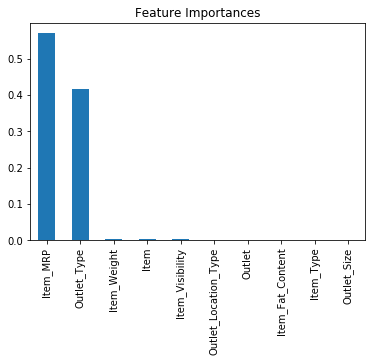

In [166]:
coef3 = pd.Series(model3.feature_importances_, columns).sort_values(ascending=False)
coef3.plot(kind='bar', title='Feature Importances')

In [167]:
model3_1 = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
model3_1.fit(x_train,y_train)
np.sqrt(mean_squared_error(model3_1.predict(x_test),y_test))

969.2892899295598

In [168]:
r2_score(model3_1.predict(x_test),y_test)

0.2881067664737341

In [169]:
#Random Forest Model
from sklearn.ensemble import RandomForestRegressor
model4 = RandomForestRegressor(n_estimators=200,max_depth=5, min_samples_leaf=100,n_jobs=4)
model4.fit(x_train,y_train)
np.sqrt(mean_squared_error(model4.predict(x_test),y_test))

959.8599051488848

In [170]:
r2_score(model4.predict(x_test),y_test)

0.28277268143682166

In [171]:
mean_squared_error(model4.predict(x_test),y_test)

921331.0375124261

In [172]:
model5 = RandomForestRegressor(n_estimators=400,max_depth=6, min_samples_leaf=100,n_jobs=4)
model5.fit(x_train,y_train)
np.sqrt(mean_squared_error(model5.predict(x_test),y_test))

961.0481893455495

In [173]:
r2_score(model3.predict(x_test),y_test)

0.30487651380392977

In [174]:
coef5 = pd.Series(model5.feature_importances_, columns)

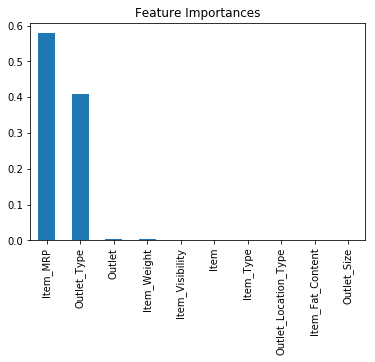

In [175]:
coef5 = pd.Series(model5.feature_importances_, columns).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

### Classification

#### Problem Statement

#### About Dataset

#### Suitable Metric based on the problem and target

#### Reading Data

In [87]:
bank_data = pd.read_csv("Data/bank-additional.csv",sep=";")
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [88]:
bank_data.y.value_counts(normalize=True)

no     0.890507
yes    0.109493
Name: y, dtype: float64

In [89]:
bank_data.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [90]:
bank_data.shape

(4119, 21)

In [91]:
bank_data.corr()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.041299,-0.014169,-0.043425,0.050931,-0.019192,-0.000482,0.098135,-0.015033,-0.041936
duration,0.041299,1.000000,-0.085348,-0.046998,0.025724,-0.028848,0.016672,-0.034745,-0.032329,-0.044218
campaign,-0.014169,-0.085348,1.000000,0.058742,-0.091490,0.176079,0.145021,0.007882,0.159435,0.161037
pdays,-0.043425,-0.046998,0.058742,1.000000,-0.587941,0.270684,0.058472,-0.092090,0.301478,0.381983
previous,0.050931,0.025724,-0.091490,-0.587941,1.000000,-0.415238,-0.164922,-0.051420,-0.458851,-0.514853
emp.var.rate,-0.019192,-0.028848,0.176079,0.270684,-0.415238,1.000000,0.755155,0.195022,0.970308,0.897173
cons.price.idx,-0.000482,0.016672,0.145021,0.058472,-0.164922,0.755155,1.000000,0.045835,0.657159,0.472560
cons.conf.idx,0.098135,-0.034745,0.007882,-0.092090,-0.051420,0.195022,0.045835,1.000000,0.276595,0.107054
euribor3m,-0.015033,-0.032329,0.159435,0.301478,-0.458851,0.970308,0.657159,0.276595,1.000000,0.942589
nr.employed,-0.041936,-0.044218,0.161037,0.381983,-0.514853,0.897173,0.472560,0.107054,0.942589,1.000000


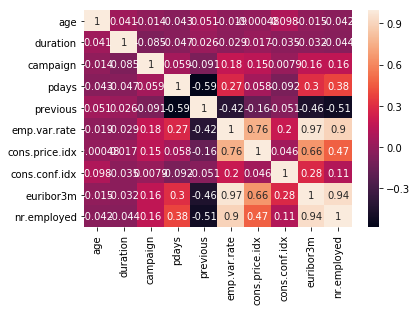

In [92]:
sns.heatmap(bank_data.corr(),annot=True)

In [93]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [94]:
num_cols = bank_data.select_dtypes(exclude=object).columns
num_cols

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [95]:
cat_cols = bank_data.select_dtypes(include=object).columns

In [96]:
bank_data.select_dtypes(include=object)

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent,no
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent,no
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent,no
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
4114,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,nonexistent,no
4115,admin.,married,high.school,no,yes,no,telephone,jul,fri,nonexistent,no
4116,student,single,high.school,no,no,no,cellular,may,mon,failure,no
4117,admin.,married,high.school,no,no,no,cellular,aug,fri,nonexistent,no


In [97]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [98]:
bank_data[num_cols[1]]

0       487
1       346
2       227
3        17
4        58
       ... 
4114     53
4115    219
4116     64
4117    528
4118    175
Name: duration, Length: 4119, dtype: int64

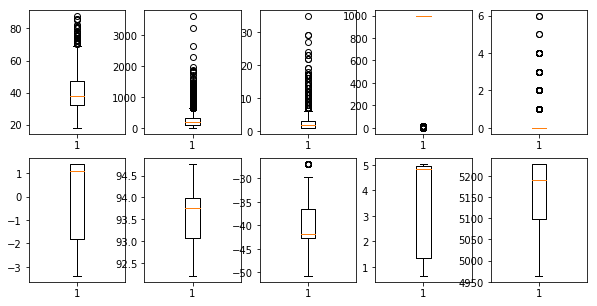

In [99]:
plt.figure(figsize=(10,5))
for i in range(len(num_cols)):
    plt.subplot(2,5,i+1)
    plt.boxplot(bank_data[num_cols[i]])

In [100]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

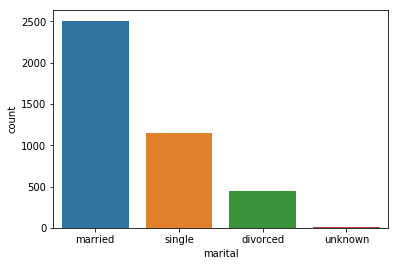

In [101]:
sns.countplot((bank_data[cat_cols[1]]))

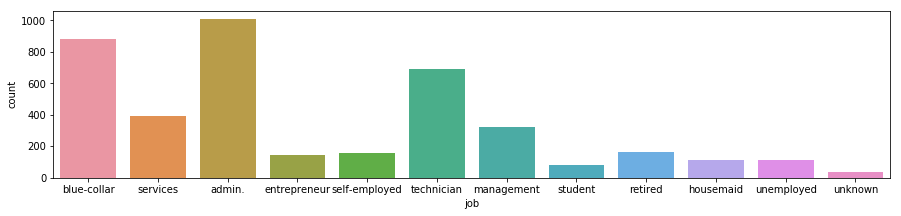

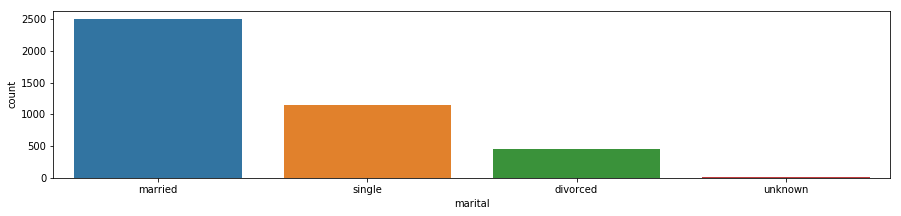

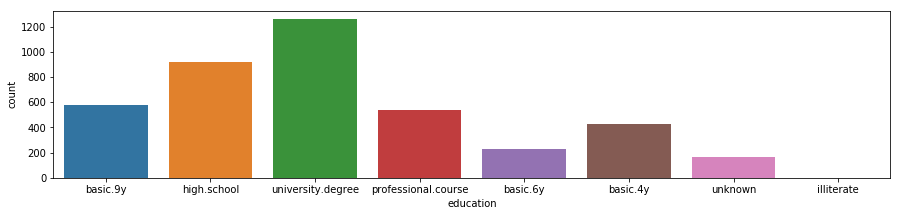

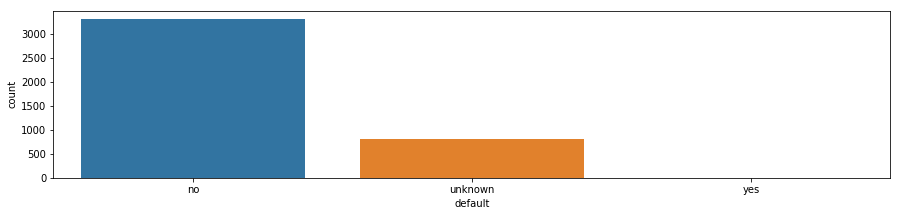

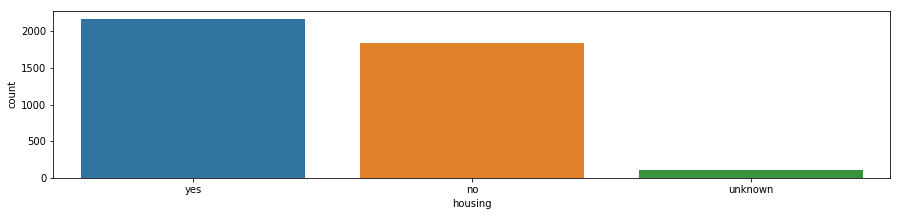

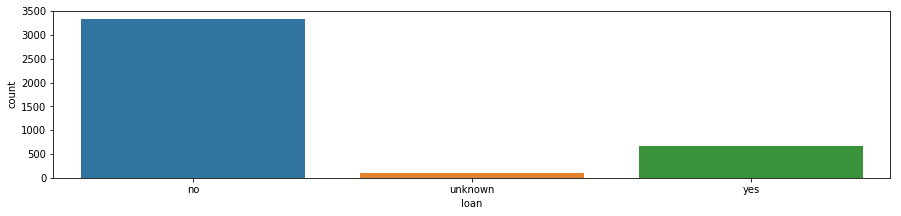

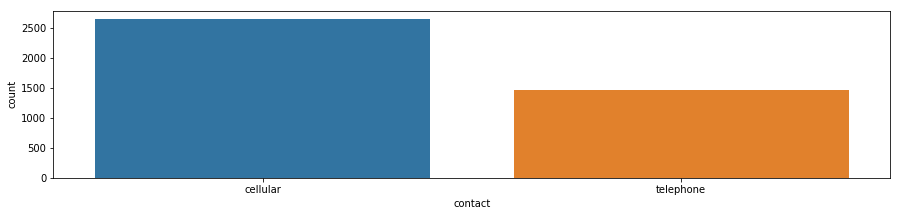

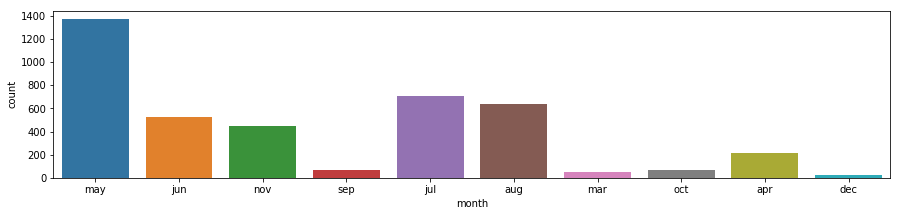

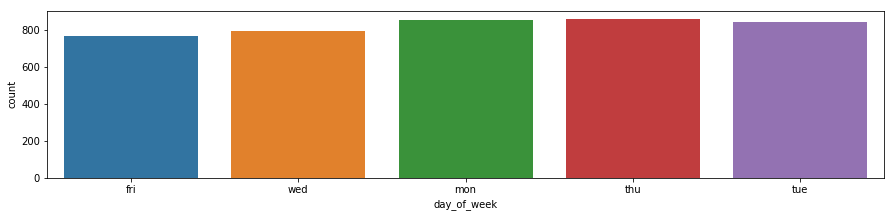

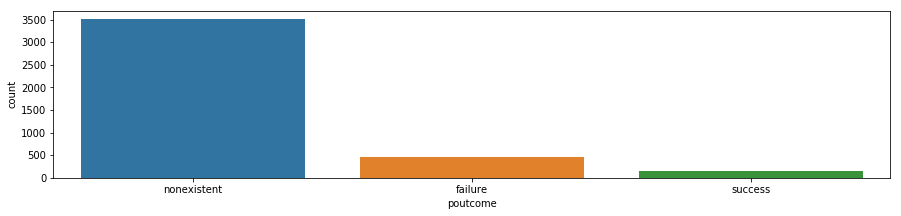

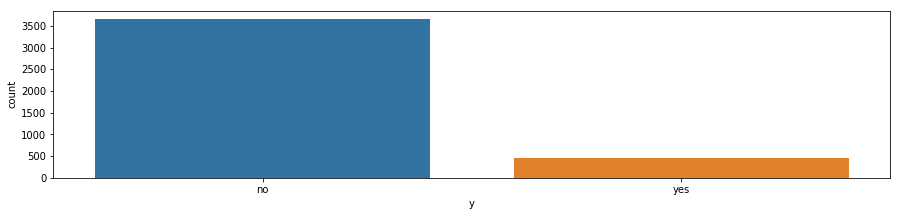

In [102]:
for i in range(len(cat_cols)):
    plt.figure(figsize=(15,40))
    plt.subplot(11,1,i+1)
    sns.countplot(bank_data[cat_cols[i]])

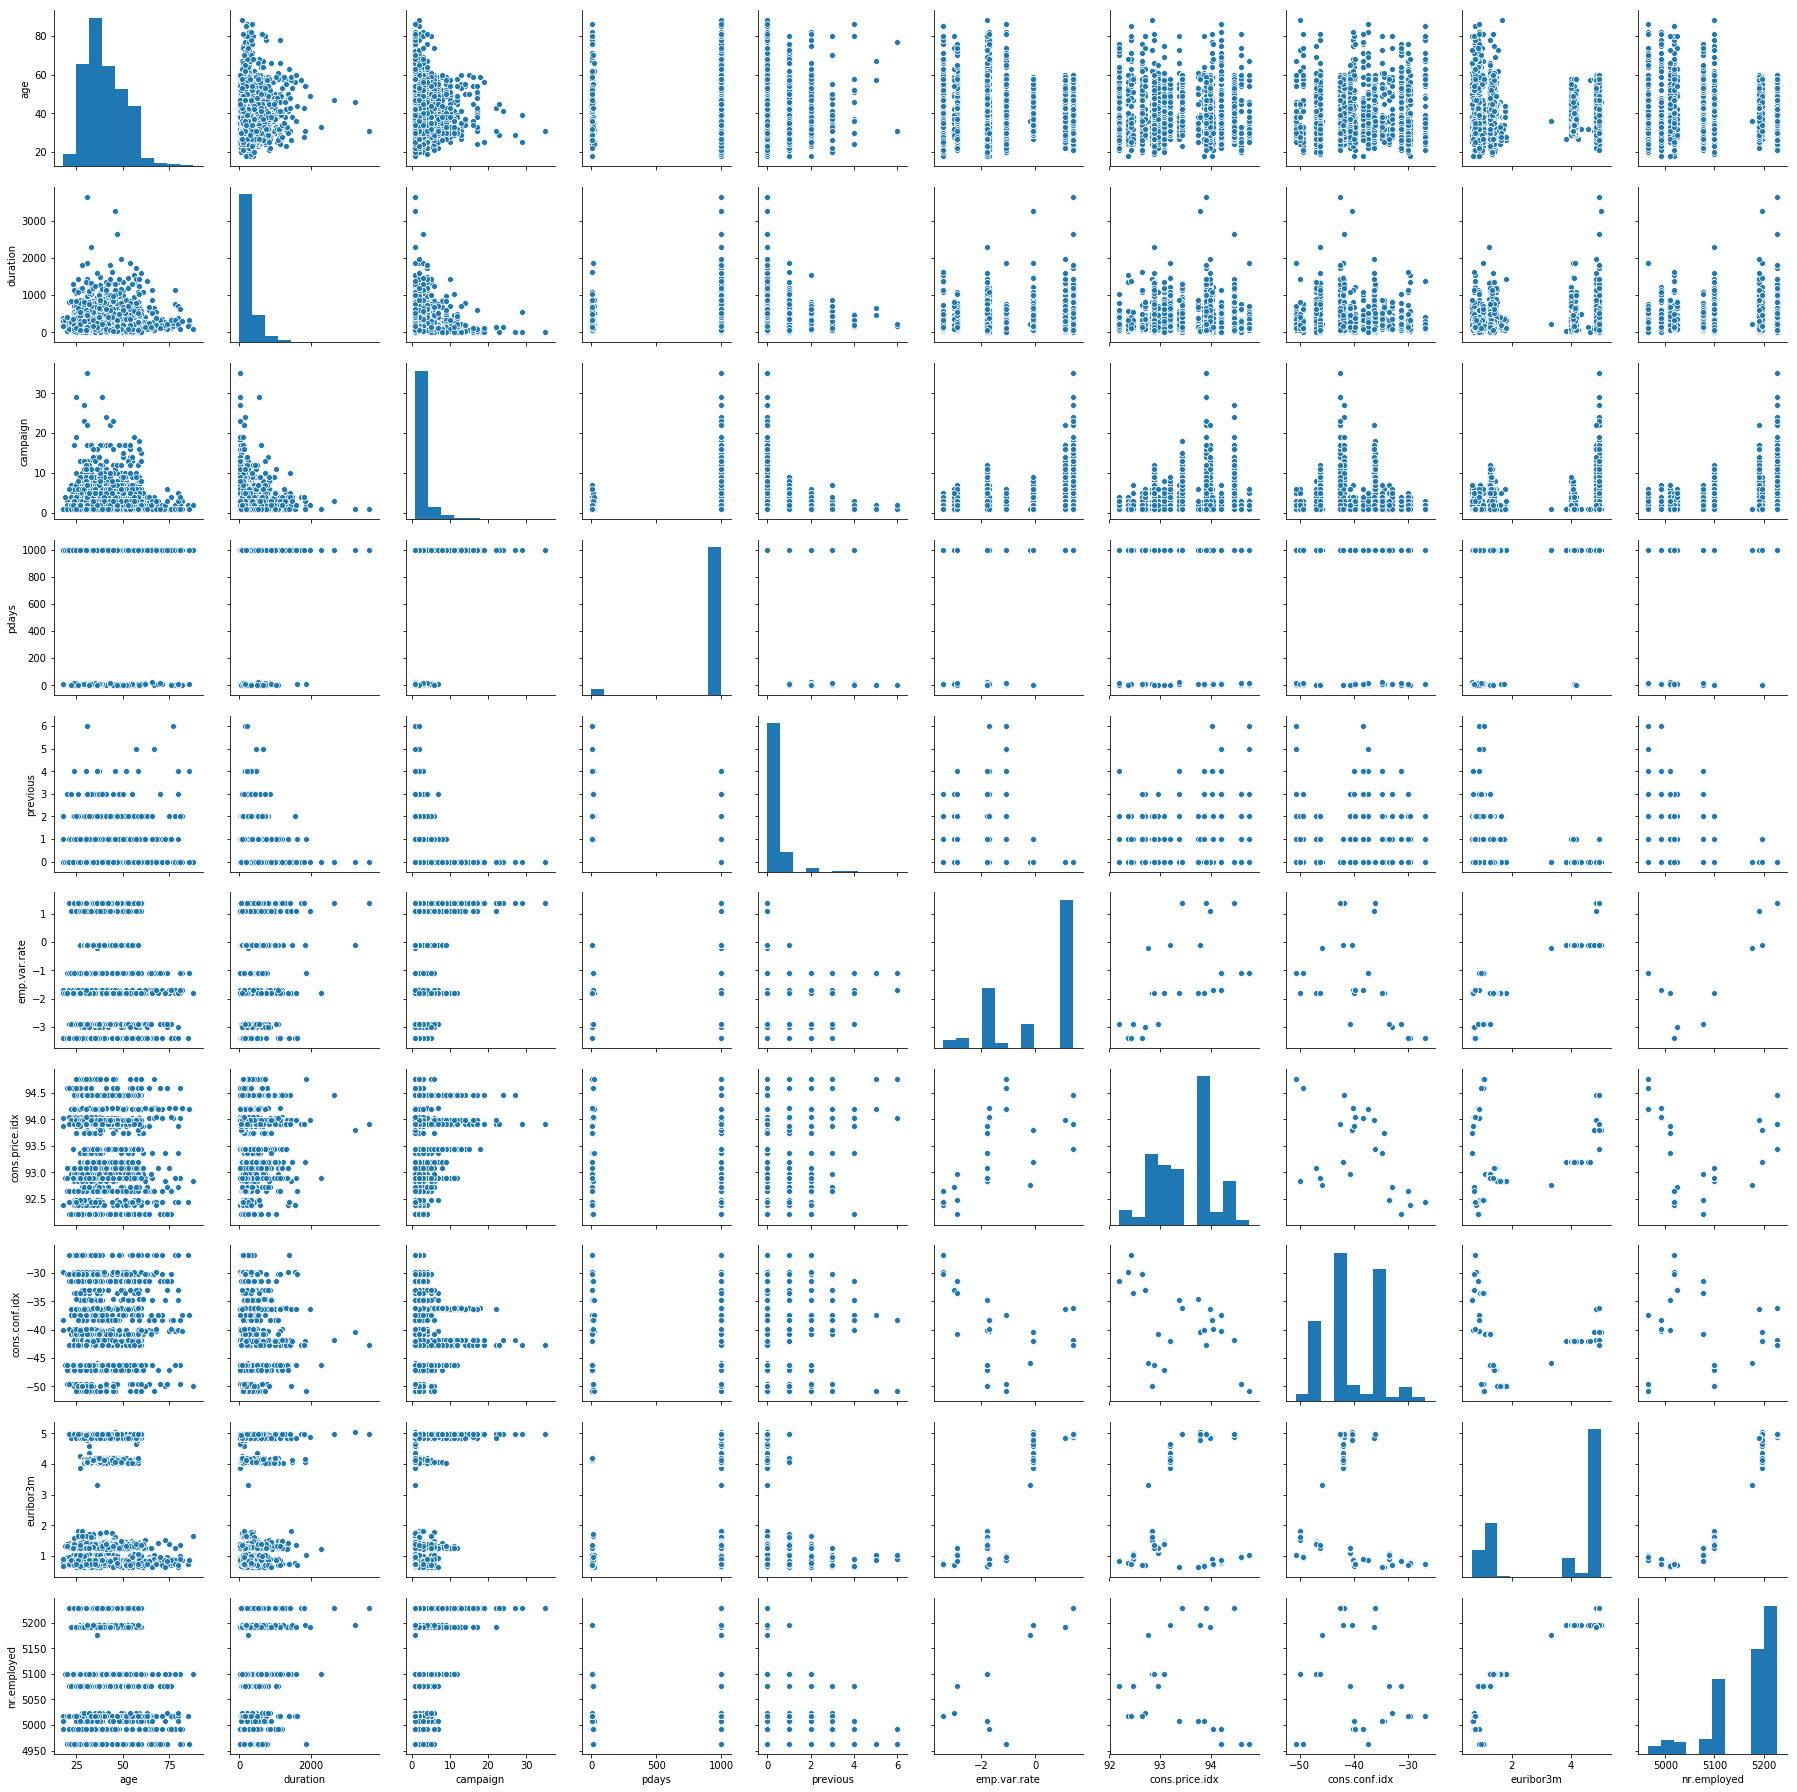

In [20]:
sns.pairplot(bank_data[num_cols])

In [103]:
Q1 = bank_data.quantile(0.25)
Q3 = bank_data.quantile(0.75)
IQR = Q3 - Q1

In [104]:
Q1

age                 32.000
duration           103.000
campaign             1.000
pdays              999.000
previous             0.000
emp.var.rate        -1.800
cons.price.idx      93.075
cons.conf.idx      -42.700
euribor3m            1.334
nr.employed       5099.100
Name: 0.25, dtype: float64

In [105]:
Q3

age                 47.000
duration           317.000
campaign             3.000
pdays              999.000
previous             0.000
emp.var.rate         1.400
cons.price.idx      93.994
cons.conf.idx      -36.400
euribor3m            4.961
nr.employed       5228.100
Name: 0.75, dtype: float64

In [106]:
print(IQR)

age                15.000
duration          214.000
campaign            2.000
pdays               0.000
previous            0.000
emp.var.rate        3.200
cons.price.idx      0.919
cons.conf.idx       6.300
euribor3m           3.627
nr.employed       129.000
dtype: float64


In [107]:
Q1 - 1.5 * IQR

age                  9.5000
duration          -218.0000
campaign            -2.0000
pdays              999.0000
previous             0.0000
emp.var.rate        -6.6000
cons.price.idx      91.6965
cons.conf.idx      -52.1500
euribor3m           -4.1065
nr.employed       4905.6000
dtype: float64

In [108]:
Q3 + 1.5 * IQR

age                 69.5000
duration           638.0000
campaign             6.0000
pdays              999.0000
previous             0.0000
emp.var.rate         6.2000
cons.price.idx      95.3725
cons.conf.idx      -26.9500
euribor3m           10.4015
nr.employed       5421.6000
dtype: float64

In [109]:
b.previous.value_counts()

False    3523
True      596
Name: previous, dtype: int64

In [110]:
bank_data.shape

(4119, 21)

In [111]:
data = bank_data.copy()

In [112]:
data.y.value_counts()

no     3668
yes     451
Name: y, dtype: int64

In [113]:
Q1

age                 32.000
duration           103.000
campaign             1.000
pdays              999.000
previous             0.000
emp.var.rate        -1.800
cons.price.idx      93.075
cons.conf.idx      -42.700
euribor3m            1.334
nr.employed       5099.100
Name: 0.25, dtype: float64

In [114]:
Q3

age                 47.000
duration           317.000
campaign             3.000
pdays              999.000
previous             0.000
emp.var.rate         1.400
cons.price.idx      93.994
cons.conf.idx      -36.400
euribor3m            4.961
nr.employed       5228.100
Name: 0.75, dtype: float64

In [115]:
data_out = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [116]:
data_out.shape

(3014, 21)

In [117]:
data_out.y.value_counts()

no     2865
yes     149
Name: y, dtype: int64

In [118]:
data_out.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [119]:
data_out.y.value_counts()

no     2865
yes     149
Name: y, dtype: int64

In [120]:
data_out.loc[data_out.y=='yes']

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
25,38,technician,married,professional.course,no,yes,no,cellular,aug,mon,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,yes
70,39,technician,single,professional.course,unknown,no,no,telephone,jun,mon,...,4,999,0,nonexistent,1.4,94.465,-41.8,4.865,5228.1,yes
71,51,services,married,high.school,unknown,yes,no,telephone,jul,mon,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,yes
88,45,admin.,single,university.degree,no,no,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,yes
132,38,admin.,divorced,university.degree,no,no,no,cellular,apr,mon,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.392,5099.1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3949,54,unemployed,married,high.school,no,yes,no,cellular,dec,wed,...,1,999,0,nonexistent,-3.0,92.713,-33.0,0.721,5023.5,yes
3960,28,admin.,single,high.school,no,no,no,cellular,jun,mon,...,2,999,0,nonexistent,-2.9,92.963,-40.8,1.260,5076.2,yes
3969,39,management,married,university.degree,no,yes,no,cellular,sep,thu,...,3,999,0,nonexistent,-1.1,94.199,-37.5,0.884,4963.6,yes
3980,43,blue-collar,married,basic.6y,no,yes,no,cellular,jun,mon,...,6,999,0,nonexistent,-2.9,92.963,-40.8,1.281,5076.2,yes


In [121]:
cat_cols

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [122]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
for i in range(len(cat_cols)):
    bank_data[cat_cols[i]] = lb.fit_transform(bank_data[cat_cols[i]])

In [123]:
bank_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,1,1,2,0,2,0,0,6,0,...,2,999,0,1,-1.8,92.893,-46.2,1.313,5099.1,0
1,39,7,2,3,0,0,0,1,6,0,...,4,999,0,1,1.1,93.994,-36.4,4.855,5191.0,0
2,25,7,1,3,0,2,0,1,4,4,...,1,999,0,1,1.4,94.465,-41.8,4.962,5228.1,0
3,38,7,1,2,0,1,1,1,4,0,...,3,999,0,1,1.4,94.465,-41.8,4.959,5228.1,0
4,47,0,1,6,0,2,0,0,7,1,...,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0


In [124]:
bank_data.y.value_counts()

0    3668
1     451
Name: y, dtype: int64

In [125]:
X = bank_data.drop('y',axis=1)
Y = bank_data['y']

In [144]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

In [145]:
X_std[1]

array([-0.10799146,  0.88051782,  1.357513  , -0.36303758, -0.49209865,
       -1.09938789, -0.46980269,  1.34453373,  0.73973685, -1.44680903,
        0.35030022,  0.56963417,  0.20103134, -0.35135598,  0.20319891,
        0.64944135,  0.71519264,  0.89226907,  0.71169841,  0.3328625 ])

In [158]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_std,Y,test_size=0.3)

In [159]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(2883, 20) (1236, 20) (2883,) (1236,)


In [160]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [161]:
from sklearn.metrics import accuracy_score
y_pred = best_knn.predict(x_test)
accuracy_score(y_pred,y_test)

0.9142394822006472

In [162]:
d = {}
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i,metric='euclidean')
    knn.fit(x_train,y_train)
    d[i] = accuracy_score(knn.predict(x_test),y_test)

In [163]:
d

{1: 0.8818770226537217,
 2: 0.8996763754045307,
 3: 0.906957928802589,
 4: 0.9021035598705501,
 5: 0.9037216828478964,
 6: 0.901294498381877,
 7: 0.9053398058252428,
 8: 0.9021035598705501,
 9: 0.9053398058252428}

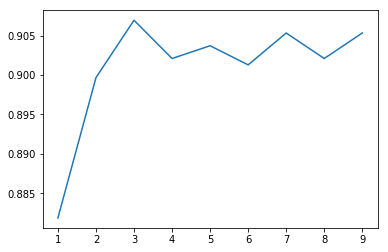

In [164]:
plt.plot(d.keys(),d.values())

In [166]:
best_knn = KNeighborsClassifier(n_neighbors=3,metric='euclidean')
best_knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [167]:
y_pred = best_knn.predict(x_test)

In [168]:
model_predicted = pd.DataFrame({'Actual-Values':y_test,'KNN-predicted':y_pred})
model_predicted

,Actual-Values,KNN-predicted
849,0,0
3336,1,0
1530,0,0
1526,0,1
2989,0,0
...,...,...
3599,0,1
3384,0,0
3732,0,0
1522,0,0


In [169]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.906957928802589
precision 0.33076923076923076
recall 0.6056338028169014
f1 score 0.4278606965174129


In [170]:
model_predicted.shape[0]

1236

In [171]:
act_neg = model_predicted.loc[(model_predicted['Actual-Values']==0) & (model_predicted['KNN-predicted']==0)]

In [172]:
act_pos = model_predicted.loc[(model_predicted['Actual-Values']==1) & (model_predicted['KNN-predicted']==1)]

In [173]:
act_neg.count()

Actual-Values    1078
KNN-predicted    1078
dtype: int64

In [174]:
act_pos.count()

Actual-Values    43
KNN-predicted    43
dtype: int64

In [175]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_pred = lr.predict(x_test)

In [177]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.9101941747572816
precision 0.34615384615384615
recall 0.6338028169014085
f1 score 0.44776119402985076


In [178]:
model_predicted['LogReg-predicted'] = y_pred

In [179]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted
849,0,0,0
3336,1,0,0
1530,0,0,0
1526,0,1,0
2989,0,0,0
...,...,...,...
3599,0,1,0
3384,0,0,0
3732,0,0,0
1522,0,0,0


In [180]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [181]:
y_pred = svc.predict(x_test)

In [182]:
model_predicted['SVC-predicted'] = y_pred

In [183]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.9142394822006472
precision 0.33076923076923076
recall 0.6935483870967742
f1 score 0.44791666666666674


In [184]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier()
sgd.fit(x_train,y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [185]:
y_pred = sgd.predict(x_test)

In [186]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8972491909385113
precision 0.35384615384615387
recall 0.5168539325842697
f1 score 0.4200913242009133


In [187]:
model_predicted['SGD-predicted'] = y_pred

In [188]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted
849,0,0,0,0,0
3336,1,0,0,0,0
1530,0,0,0,0,0
1526,0,1,0,0,0
2989,0,0,0,0,0
...,...,...,...,...,...
3599,0,1,0,1,0
3384,0,0,0,0,0
3732,0,0,0,0,0
1522,0,0,0,0,0


In [189]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [190]:
y_pred = bnb.predict(x_test)

In [191]:
model_predicted['BNB-predicted'] = y_pred

In [192]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted
849,0,0,0,0,0,0
3336,1,0,0,0,0,1
1530,0,0,0,0,0,0
1526,0,1,0,0,0,0
2989,0,0,0,0,0,1
...,...,...,...,...,...,...
3599,0,1,0,1,0,0
3384,0,0,0,0,0,1
3732,0,0,0,0,0,0
1522,0,0,0,0,0,0


In [193]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8260517799352751
precision 0.5076923076923077
recall 0.30414746543778803
f1 score 0.38040345821325644


In [194]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [195]:
y_pred = gnb.predict(x_test)

In [196]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8551779935275081
precision 0.5846153846153846
recall 0.3781094527363184
f1 score 0.459214501510574


In [197]:
model_predicted['GNB-predicted'] = y_pred

In [198]:
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted
849,0,0,0,0,0,0,1
3336,1,0,0,0,0,1,1
1530,0,0,0,0,0,0,0
1526,0,1,0,0,0,0,0
2989,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...
3599,0,1,0,1,0,0,0
3384,0,0,0,0,0,1,1
3732,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0


In [199]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [200]:
y_pred = dt.predict(x_test)

In [201]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8948220064724919
precision 0.4846153846153846
recall 0.5
f1 score 0.49218749999999994


In [202]:
model_predicted['DT-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted
849,0,0,0,0,0,0,1,0
3336,1,0,0,0,0,1,1,0
1530,0,0,0,0,0,0,0,0
1526,0,1,0,0,0,0,0,0
2989,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
3599,0,1,0,1,0,0,0,0
3384,0,0,0,0,0,1,1,0
3732,0,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0,0


In [203]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
base_learners = list(range(1,100,10))
depth = [2,5,6]
param_grid = {'max_depth': depth, 'n_estimators': base_learners}
rf = RandomForestClassifier(class_weight="balanced")
grd_model = GridSearchCV(rf,param_grid,cv=5,n_jobs=-1)
grd_model.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [204]:
rf = RandomForestClassifier(class_weight="balanced")
rf.fit(x_train,y_train)
rf.feature_importances_

array([0.06319082, 0.03448964, 0.01462792, 0.02814799, 0.00797512,
       0.01252644, 0.00882995, 0.01411304, 0.02199187, 0.0255449 ,
       0.39566093, 0.03132012, 0.02074707, 0.01101742, 0.01776246,
       0.03348052, 0.03042278, 0.03804846, 0.10862046, 0.0814821 ])

In [205]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [206]:
import_fet = pd.Series(rf.feature_importances_,X.columns)

In [213]:
import_fet.sort_values(ascending=False)

duration          0.395661
euribor3m         0.108620
nr.employed       0.081482
age               0.063191
cons.conf.idx     0.038048
job               0.034490
emp.var.rate      0.033481
campaign          0.031320
cons.price.idx    0.030423
education         0.028148
day_of_week       0.025545
month             0.021992
pdays             0.020747
poutcome          0.017762
marital           0.014628
contact           0.014113
housing           0.012526
previous          0.011017
loan              0.008830
default           0.007975
dtype: float64

In [214]:
y_pred = grd_model.predict(x_test)

In [215]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.8745954692556634
precision 0.8076923076923077
recall 0.44680851063829785
f1 score 0.5753424657534246


In [216]:
model_predicted['RF-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted,RF-predicted
849,0,0,0,0,0,0,1,0,1
3336,1,0,0,0,0,1,1,0,0
1530,0,0,0,0,0,0,0,0,0
1526,0,1,0,0,0,0,0,0,0
2989,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
3599,0,1,0,1,0,0,0,0,1
3384,0,0,0,0,0,1,1,0,0
3732,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0,0,0


In [217]:
from sklearn.ensemble import ExtraTreesClassifier
et = ExtraTreesClassifier()
et.fit(x_train,y_train)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [218]:
y_pred = et.predict(x_test)

In [219]:
print("accuracy",accuracy_score(y_pred,y_test))
print("precision",precision_score(y_pred,y_test))
print("recall",recall_score(y_pred,y_test))
print("f1 score",f1_score(y_pred,y_test))

accuracy 0.9037216828478964
precision 0.2692307692307692
recall 0.5932203389830508
f1 score 0.3703703703703704


In [220]:
model_predicted['ET-predicted'] = y_pred
model_predicted

,Actual-Values,KNN-predicted,LogReg-predicted,SVC-predicted,SGD-predicted,BNB-predicted,GNB-predicted,DT-predicted,RF-predicted,ET-predicted
849,0,0,0,0,0,0,1,0,1,0
3336,1,0,0,0,0,1,1,0,0,0
1530,0,0,0,0,0,0,0,0,0,0
1526,0,1,0,0,0,0,0,0,0,0
2989,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
3599,0,1,0,1,0,0,0,0,1,0
3384,0,0,0,0,0,1,1,0,0,0
3732,0,0,0,0,0,0,0,0,0,0
1522,0,0,0,0,0,0,0,0,0,0


In [221]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1082,   24],
       [  95,   35]], dtype=int64)

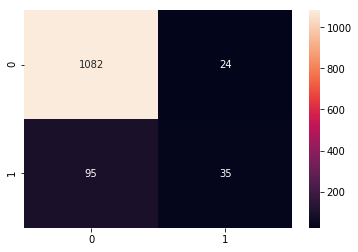

In [222]:
cm_df = pd.DataFrame(cm,index=np.unique(y_test), columns=np.unique(y_test))
cm_df['index'] = 'Actual'
cm_df['columns'] = 'Predicted'
sns.heatmap(cm,annot=True,fmt='g')